# Proyecto 2 - Encuesta Multiproposito

**Integrantes**
- Juan Sebastian Sanchez Delgado - 202013577
- Juanita Ovalle
- Miguel Angel Cardenas - 202010998
- Karol Valentina Chaves
- Santiago Paeres Gonzalez - 201425176


## 1. Preparacion de datos
En esta etapa se analizan las caracteristicas principales del conjunto de datos, asi como también las dimensiones de calidad de estos (completitud, unicidad, consistencia, validez). Posteriormente, se limpian los datos y se transforman para la futura etapa de modelamiento.

In [207]:
# Se importan las librerias a usar y se espcifica un numero maximo de filas y columnas
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [208]:
# Se cargan los datos

# Encuesta año 2017:
df_encuesta_2017 = pd.read_csv("./DATOS/Proyecto 2 - BI - Asma DatosAjus/Datos_proyecto_II_BI_2017.csv", encoding='utf-8')
df_encuesta_sin_asma_2017 = pd.read_csv("./DATOS/DatosMultipropositoSinAsma-Proy2/Datos_proyecto_II_BI_2017_sin_asma.csv", encoding='latin-1')
# Combinar los DataFrames a lo largo de las filas (axis=0)
df_encuesta_2017 = pd.concat([df_encuesta_2017, df_encuesta_sin_asma_2017], axis=0)

# Encuesta año 2021:
df_encuesta_2021 = pd.read_csv("./DATOS/Proyecto 2 - BI - Asma DatosAjus/Datos_proyecto_II_BI_2021.csv", encoding='utf-8', sep=";")
df_encuesta_sin_asma_2021 = pd.read_csv("./DATOS/DatosMultipropositoSinAsma-Proy2/Datos_proyecto_II_BI_2021_sin_asma.csv", encoding='latin-1')

df_encuesta_2021 = pd.concat([df_encuesta_2021, df_encuesta_sin_asma_2021], axis=0)

/var/folders/pr/rtgpq6150t7d3232lzzj_h280000gn/T/ipykernel_32944/817674192.py:4: DtypeWarning: Columns (145,295,297,380,381,383,469,495,496,499,500,501,508,509,510,511) have mixed types. Specify dtype option on import or set low_memory=False.
  df_encuesta_2017 = pd.read_csv("./DATOS/Proyecto 2 - BI - Asma DatosAjus/Datos_proyecto_II_BI_2017.csv", encoding='utf-8')
/var/folders/pr/rtgpq6150t7d3232lzzj_h280000gn/T/ipykernel_32944/817674192.py:5: DtypeWarning: Columns (12,145,146,147,280,285,295,296,297,304,379,380,381,382,383,469,470,495,496,498,499,500,501,507,508,509,510,511,512,513) have mixed types. Specify dtype option on import or set low_memory=False.
  df_encuesta_sin_asma_2017 = pd.read_csv("./DATOS/DatosMultipropositoSinAsma-Proy2/Datos_proyecto_II_BI_2017_sin_asma.csv", encoding='latin-1')
/var/folders/pr/rtgpq6150t7d3232lzzj_h280000gn/T/ipykernel_32944/817674192.py:10: DtypeWarning: Columns (334,410,412,540,541,543,545,549,552,553,554,555,556,557) have mixed types. Specify d

In [209]:
df_encuesta_2017.shape

(319952, 552)

In [210]:
df_encuesta_2021.shape

(292281, 601)

Como se puede ver la encuesta realizada en el año 2021 tiene una población más grande que la se hizo en el año 2017.

In [211]:
df_encuesta_2017.dtypes

Unnamed: 0          int64
DIRECTORIO          int64
DIRECTORIO_HOG      int64
DIRECTORIO_PER      int64
SECUENCIA           int64
                   ...   
NPCHP35D          float64
NPCHP35E          float64
NPCHP35F          float64
NPCHP35J          float64
NPCHP35I          float64
Length: 552, dtype: object

In [212]:
df_encuesta_2021.dtypes

Unnamed: 0          int64
DIRECTORIO        float64
DIRECTORIO_HOG      int64
DIRECTORIO_PER      int64
DPTO                int64
                   ...   
NPCHP35J          float64
NPCHP35K          float64
NPCHP36           float64
NPCHP36A          float64
NPCHP37           float64
Length: 601, dtype: object

La mayoria de las preguntas de la encuesta se responden de forma numerica. Es decir son de selección multiple.

In [213]:
df_encuesta_2017.head(15)

,Unnamed: 0,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,SECUENCIA,SECUENCIA_P,ORDEN,NVCAP99,DPTOMPIO,CLASE,TOT_HOG_COMP,FEX_C,LOCALIDAD_TEX,COD_UPZ,CODLOCALIDAD,SECUENCIA.B,SECUENCIA_P.B,ORDEN.B,NVCBP1,NVCBP2,NVCBP3,NVCBP4,NVCBP5,NVCBP6,NVCBP7,NVCBP8A,NVCBP8B,NVCBP8C,NVCBP8D,NVCBP8E,NVCBP8F,NVCBP8G,NVCBP8H,NVCBP8I,NVCBP8J,NVCBP9,NVCBP10,NVCBP11A,NVCBP11AA,NVCBP11B,NVCBP11C,NVCBP11D,NVCBP11DA,NVCBP12,NVCBP13,NVCBP14A,NVCBP14B,NVCBP14C,NVCBP14D,NVCBP14E,NVCBP14F,NVCBP14G,NVCBP14H,NVCBP14I,NVCBP14J,NVCBP14K,NVCBP15A,NVCBP15B,NVCBP15C,NVCBP15D,NVCBP15E,NVCBP15F,NVCBP15G,NVCBP15H,SECUENCIA_P.C,ORDEN.C,NHCCP1,NHCCP2,NHCCP3,NHCCP4A,NHCCP4B,NHCCP4C,NHCCP4D,NHCCP4E,NHCCP4F,NHCCP5,NHCCP6,NHCCP7,NHCCP8A,NHCCP8B,NHCCP8C,NHCCP8D,NHCCP8E,NHCCP8F,NHCCP8G,NHCCP8H,NHCCP8I,NHCCP8J,NHCCP9,NHCCP10,NHCCP11,NHCCP12,NHCCP13A,NHCCP13B,NHCCP13C,NHCCP13D,NHCCP13E,NHCCP13F,NHCCP13G,NHCCP13H,NHCCP13I,NHCCP13J,NHCCP14,NHCCP14A,NHCCP15,NHCCP15A,NHCCPCTRL2,NHCCP19,NHCCP20,NHCCP20A,NHCCP21A,NHCCP21B,NHCCP22A,NHCCP22B,NHCCP22C,NHCCP22D,NHCCP22E,NHCCP22F,NHCCP22G,NHCCP23,NHCCP24,NHCCP25,NHCCP26,NHCCP26A,NHCCP27,NHCCP28,NHCCP28A,NHCCP29,NHCCP29A,NHCCP31,NHCCP32,NHCCP33,NHCCP34,NHCCP35,NHCCP35A,NHCCP36A,NHCCP36B,NHCCP36C,NHCCP36D,NHCCP37,NHCCP38,NHCCP38A,NHCCP38B,NHCCP38C,NHCCP38D,NHCCP38E,NHCCP38F,NHCCP38G,NHCCP39A,NHCCP39B,NHCCP393,NHCCP39C,NHCCP39D,NHCCP39E,NHCCP39F,NHCCP39G,NHCCP399,NHCCP40A,NHCCP40B,NHCCP40C,NHCCP40D,NHCCP40E,NHCCP40F,NHCCP40G,NHCCP40H,NHCCP40I,NHCCP40J,NHCCP40K,NHCCP40L,NHCCP40M,NHCCP40N,NHCCP40O,NHCCP40P,NHCCP41,NHCCP41A,NHCCP41B,NHCCP42,NHCCP42A,NHCCP42CB,NHCCP44,NHCCP44A,NHCCP44B,NHCCP45,NHCCP45A,NHCCP45B,NHCCP46A,NHCCP46B,NHCCP46C,NHCCP46D,NHCCP46E,NHCCP46F,NHCCP46G,NHCCP46H,NHCCP46I,NHCCP46J,NHCCP46K,NHCCP46L,NHCCP46M,SECUENCIA_P.D,ORDEN.D,NHCDP1,NHCDP2,NHCDP2A,NHCDP2B,NHCDP3,NHCDP4,NHCDP4A,NHCDP4B,NHCDP5,NHCDP6,NHCDP6A,NHCDP6B,NHCDP7,NHCDP7A,NHCDP8,NHCDP9,NHCDP10,NHCDP10A,NHCDP11,NHCDP11A,NHCDP11B,NHCDP12,NHCDP13,NHCDP14A,NHCDP14B,NHCDP14C,NHCDP14D,NHCDP15,NHCDP16,NHCDP17,NHCDP17A,NHCDP18,NHCDP18A,NHCDP18B,NHCDP19,NHCDP20,NHCDP21,NHCDP21A,NHCDP22,NHCDP23,NHCDP23A,NHCDP23B,NHCDP24,NHCDP24A,NHCDP25,NHCDP25A,NHCDP26,NHCDP26A,NHCDP27,NHCDP27A,NHCDP27B,NHCDP28,NHCDP29,NHCDP29A,NHCDP29B,NHCDP30_1,NHCDP30A,NHCDP30B,NHCDP30_2,NHCDP30_3,NHCDP30_4,NHCDP31,NHCDP32,NHCDP32A,NHCDP32B,SECUENCIA_P.E,ORDEN.E,NPCEP4,NPCEP5,NPCEP6,NPCEP7,NPCEP8,NPCEP8A,NPCEP9,NPCEP9A,NPCEP9B,NPCEP10,NPCEP11A,NPCEP11AA,NPCEP11AB,NPCEP11AC,NPCEP11,NPCEP13,NPCEP13A,NPCEP13B,NPCEP13C,NPCEP14,NPCEP15,NPCEP16A,NPCEP16B,NPCEP16C,NPCEP16D,NPCEP16E,NPCEP16F,NPCEP16G,NPCEP16H,NPCEP16I,NPCEP16J,NPCEP16K,NPCEP16A1,NPCEP16AA,NPCEP16AB,NPCEP16B1,NPCEP17,NPCEP18,NPCEP19,NPCEP21,NPCEP21A,NPCEP22,NPCEP22A,NPCEP24,NPCEP24A,NPCEP25,NPCEP25A,NPCEP27,NPCEP26,NPCEP5A,SECUENCIA_P.F,ORDEN.F,NPCFP1,NPCFP2,NPCFP3,NPCFP4A,NPCFP4B,NPCFP4C,NPCFP4D,NPCFP4E,NPCFP5,NPCFP7,NPCFP8,NPCFP8A,NPCFP8B,NPCFP9,NPCFP10A,NPCFP10B,NPCFP10C,NPCFP10D,NPCFP10E,NPCFP11,NPCFP11A,NPCFP12,NPCFP13A,NPCFP13B,NPCFP13C,NPCFP13D,NPCFP13E,NPCFP14A,NPCFP14B,NPCFP14C,NPCFP14D,NPCFP14E,NPCFP14F,NPCFP14G,NPCFP14H,NPCFP14I,NPCFP14J,NPCFP14K,NPCFP14L,NPCFP15,NPCFP16,NPCFP18,NPCFP19,NPCFP20,NPCFP21A,NPCFP21B,NPCFP21C,NPCFP21D,NPCFP21E,NPCFP21F,NPCFP21G,NPCFP21H,NPCFP21I,NPCFP22,NPCFP23,NPCFP24,NPCFP24A,NPCFP24B,NPCFP24C,NPCFP25A,NPCFP25B,NPCFP25BA,NPCFP25C,NPCFP25E,NPCFP25F,NPCFP26,NPCFP26A,NPCFP27,NPCFP29,NPCFP30,NPCFP31,NPCFP32,NPCFP33A,NPCFP33AA,NPCFP33B,NPCFP33BA,NPCFP33C,NPCFP33CA,NPCFP33D,NPCFP33DA,NPCFP33E,NPCFP33EA,NPCFP33F,NPCFP33FA,NPCFP34,NPCFP35A,NPCFP35AA,NPCFP35B,NPCFP35BA,NPCFP36,NPCFP37,NPCFP38,NPCFP39,NPCFP39A,NPCFP40A,NPCFP40B,NPCFP40C,NPCFP40D,NPCFP40E,NPCFP40F,NPCFP40,NPCFP41,NPCFP42,NPCFP43,NPCFP43A,NPCFP44,NPCFP45,SECUENCIA_P.G,ORDEN.G,SECUENCIA_P.H,ORDEN.H,NPCHP1,NPCHP2,NPCHP3,NPCHP4,NPCHP4A,NPCHP5,NPCHP6,NPCHP6A,NPCHP7,NPCHP9A,NPCHP9B,NPCHP9C,NPCHP9D,NPCHP9E,NPCHP9F,NPCHP10,NPCHP10A,NPCHP11,NPCHP11A,NPCHP12,NPCHP12A,NPCHP13,NPCHP13A,NPCHP13B,NPCHP14,NPCHP15A,NPCHP15B,NPCHP16,NPCHP17,NPCHP18A,NPCHP18B,NPCHP18C,

In [214]:
df_encuesta_2021.head(15)

,Unnamed: 0,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C,NVCBP1,NVCBP2,NVCBP3,NVCBP4,NVCBP5,NVCBP6,NVCBP7,NVCBP8A,NVCBP8B,NVCBP8C,NVCBP8D,NVCBP8E,NVCBP8F,NVCBP8G,NVCBP8H,NVCBP8I,NVCBP8J,NVCBP9,NVCBP9A1,NVCBP9A2,NVCBP9A3,NVCBP9A4,NVCBP10,NVCBP11A,NVCBP11AA,NVCBP11B,NVCBP11C,NVCBP11D,NVCBP11DA,NVCBP12,NVCBP13,NVCBP14A,NVCBP14B,NVCBP14C,NVCBP14D,NVCBP14E,NVCBP14L,NVCBP14F,NVCBP14G,NVCBP14H,NVCBP14I,NVCBP14J,NVCBP14K,NVCBP15A,NVCBP15B,NVCBP15C,NVCBP15D,NVCBP15E,NVCBP15F,NVCBP15G,NVCBP15H,NVCBP15I,NVCBP15J,NVCBP15K,NVCBP15L,NVCBP15M,NVCBP16A1,NVCBP16A2,NVCBP16A3,NVCBP16A4,NVCBP16,SECUENCIA_P,NHCCP1,NHCCP2,NHCCP3,NHCCP4A,NHCCP4B,NHCCP4C,NHCCP4D,NHCCP4E,NHCCP5,NHCCP6,NHCCP7,NHCCP8_1,NHCCP8_2,NHCCP8_3,NHCCP8_4,NHCCP8_5,NHCCP8_6,NHCCP8_7,NHCCP8_8,NHCCP8_9,NHCCP8_10,NHCCP9,NHCCP10,NHCCP10A,NHCCP10B,NHCCP10C,NHCCP10D,NHCCP10E,NHCCP11,NHCCP11A,NHCCP12,NHCCP13A,NHCCP13B,NHCCP13C,NHCCP13D,NHCCP13E,NHCCP13F,NHCCP13G,NHCCP13H,NHCCP13I,NHCCP13J,NHCCP14,NHCCP14A,NHCCP15,NHCCP15A,NHCCPCTRL2,NHCCP19,NHCCP19A,NHCCP20,NHCCP22A,NHCCP22B,NHCCP22C,NHCCP22D,NHCCP22E,NHCCP23,NHCCP24,NHCCP25,NHCCP26,NHCCP26A,NHCCP27,NHCCP28,NHCCP28A,NHCCP29,NHCCP29A,NHCCP31,NHCCP32,NHCCP33,NHCCP34,NHCCP35,NHCCP35A,NHCCP36A,NHCCP36B,NHCCP36C,NHCCP37,NHCCP38,NHCCP38AA,NHCCP38AB,NHCCP38AC,NHCCP38AD,NHCCP38AF,NHCCP38AG,NHCCP38B,NHCCP39A,NHCCP39B,NHCCP393,NHCCP39C,NHCCP39D,NHCCP39E,NHCCP39F,NHCCP39G,NHCCP399,NHCCP40A,NHCCP40B,NHCCP40C,NHCCP40D,NHCCP40E,NHCCP40F,NHCCP40G,NHCCP40H,NHCCP40I,NHCCP40J,NHCCP40K,NHCCP40L,NHCCP40M,NHCCP40N,NHCCP40O,NHCCP40P,NHCCP41,NHCCP41A,NHCCP41B,NHCCP42,NHCCP42A,NHCCP44,NHCCP44A,NHCCP44B,NHCCP45,NHCCP45A,NHCCP45B,NHCCP41_A,NHCCP41_B,NHCCP46A,NHCCP46B,NHCCP46C,NHCCP46D,NHCCP46E,NHCCP46F,NHCCP46G,NHCCP46H,NHCCP46I,NHCCP46J,NHCCP46K,NHCCP46L,NHCCP46M,NHCCP47A,NHCCP47A1,NHCCP47B,NHCCP47B1,NHCCP47C,SECUENCIA_P.D,NHCDP1,NHCDP2,NHCDP2A,NHCDP3,NHCDP4,NHCDP4A,NHCDP5,NHCDP6,NHCDP6A,NHCDP7,NHCDP7A,NHCDP8,NHCDP9,NHCDP10,NHCDP10A,NHCDP11,NHCDP11A,NHCDP12,NHCDP13,NHCDP14A,NHCDP14B,NHCDP14C,NHCDP14D,NHCDP15,NHCDP16,NHCDP17,NHCDP17A,NHCDP18,NHCDP18A,NHCDP19,NHCDP20,NHCDP21,NHCDP21A,NHCDP22,NHCDP23,NHCDP23A,NHCDP24,NHCDP24A,NHCDP26,NHCDP26A,NHCDP27,NHCDP27A,NHCDP27B,NHCDP28,NHCDP29,NHCDP29A,NHCDP30_1,NHCDP30_2,NHCDP30_3,NHCDP30_4,NHCDP30A,NHCDP30B,NHCDP31,NHCDP32,NHCDP32A,NHCDP33,NHCDP33A,SECUENCIA_P.E,ORDEN,NPCEP4,NPCEP_5,NPCEP5,SEXO,NPCEP6,NPCEP7,NPCEP8,NPCEP8A,NPCEP9,NPCEP9A,NPCEP9B,NPCEP9C,NPCEP10,NPCEP11A,NPCEP11AA,NPCEP11AB,NPCEP11D,NPCEP11,NPCEP13,NPCEP13A,NPCEP13B,NPCEP13D,NPCEP14,NPCEP16_1,NPCEP16A_1,NPCEP16B_1,NPCEP16D_1,NPCEP17_1,NPCEP15,NPCEP16_1A,NPCEP16_2A,NPCEP16_3A,NPCEP16_4A,NPCEP16_5A,NPCEP16_6A,NPCEP16_7A,NPCEP16_8A,NPCEP16A,NPCEP16AA,NPCEP16AB,NPCEP16B,NPCEP21A_1,NPCEP21A_2M,NPCEP21B_1,NPCEP21B_2,NPCEP21B_3,NPCEP21B_4,NPCEP21B_5,NPCEP21C_1,NPCEP17,NPCEP21,NPCEP21A,NPCEP22,NPCEP22A,NPCEP24,NPCEP24A,NPCEP25,NPCEP25A,NPCEP27,NPCEP26,NPCEP29,NPCEP29A,SECUENCIA_P.F,ORDEN.F,NPCFP1,NPCFP2,NPCFP3,NPCFP4A,NPCFP4B,NPCFP4C,NPCFP4D,NPCFP4E,NPCFP5,NPCFP7,NPCFP7A1,NPCFP7A2,NPCFP7A3,NPCFP7A4,NPCFP8,NPCFP8A,NPCFP8A2,NPCFP8A3,NPCFP8A4,NPCFP8A5,NPCFP8A6,NPCFP8A7,NPCFP8A8,NPCFP8B,NPCFP9,NPCFP10A,NPCFP10B,NPCFP10C,NPCFP10D,NPCFP11,NPCFP11A,NPCFP12,NPCFP13A,NPCFP13B,NPCFP13C,NPCFP13D,NPCFP13F,NPCFP14A,NPCFP14B,NPCFP14C,NPCFP14D,NPCFP14E,NPCFP14F,NPCFP14G,NPCFP14H,NPCFP14I,NPCFP14J,NPCFP14K,NPCFP15,NPCFP16,NPCFP18,NPCFP19,NPCFP20,NPCFP21A1,NPCFP21A2,NPCFP21A3,NPCFP21A4,NPCFP21A5,NPCFP21A6,NPCFP21A7,NPCFP21A8,NPCFP22A1,NPCFP22A2,NPCFP22A21,NPCFP22A3,NPCFP22A4,NPCFP24,NPCFP24A,NPCFP24B,NPCFP25A,NPCFP25B,NPCFP25C,NPCFP25D,NPCFP25F,NPCFP25BA,NPCFP26,NPCFP26A,NPCFP27,NPCFP29,NPCFP30,NPCFP31,NPCFP32,NPCFP33A,NPCFP33AA,NPCFP33B,NPCFP33BA,NPCFP33C,NPCFP33CA,NPCFP33D,NPCFP33DA,NPCFP33E,NPCFP33EA,NPCFP33F,NPCFP33FA,NPCFP33G,NPCFP33GA,NPCFP33H,NPCFP33HA,NPCFP34,NPCFP35A,NPCFP35AA,NPCFP35B,NPCFP35BA,NPCFP36,NPCFP37,NPCFP38,NPCFP39A,NPCFP40A,NPCFP40B,NPCFP40C,NPCFP40D,NPCF

Ahora dentro del conjunto completo de datos sobre la Encuesta Multipropósito, se escogio un subconjunto de datos con las preguntas que son de interes para resolver los requerimientos analiticos planteados. Dentro de estas preguntas que se consideran de interes se incluyen:

- Año 2017:

    1. **LOCALIDAD_TEX**: Nombre de la localidad

    2. **DPTOMPIO**: Divipola departamento-municipio
        
    3. **NPCFP14I**: A ... le han diagnosticado alguna de estas enfermedades o problemas de salud: 9. Asma? 

- Año 2021:
    1. **DPTO**: Departamento

    2. **MPIO**: Municipio

    3. **NOMBRE_LOCALIDAD**: Nombre de la localidad 

    4. **NOMBRE_ESTRATO**: Nombre estrato de muestreo

    5. **NVCBP15I**: ¿Cuáles de los siguientes problemas presenta el entorno donde está ubicada su vivienda?: 9. Contaminación de cuerpos de agua (ríos, caños, humedales, lagunas)

    6. **NPCFP14F**: ¿A ...le han diagnosticado alguna de estas enfermedades o problemas de salud: 6. Enfermedades respiratorias crónicas como: Asma, EPOC, Enfisema?

- Preguntas de interes para ambas encuentas:

    1. **NVCBP11AA**: Estrato por tarifa de servicios publicos.

    2. **NPCFP14H**: A ... le han diagnosticado alguna de estas enfermedades o problemas de salud: 8. ¿Enfermedades mentales, trastornos de la conciencia (depresión, ansiedad)? 

    3. **NPCFP36**: En los ÚLTIMOS 30 DÍAS, ¿cuántas veces por semana ... practicó deporte o realizó actividad física por 30 minutos continuos o más?

    4. **NVCBP9**: ¿Algún espacio de la edificación donde está ubicada la vivienda está dedicado a negocios de industria, comercio o servicios? 

    5. **NVCBP12**: ¿Cuál es el material predominante de las paredes exteriores? 

    6. **NVCBP13**: ¿Cuál es el material predominante de los pisos? 

    7. **NVCBP14A**: La vivienda está cerca de:1. Fábricas o industrias 

    8. **NPCFP14B**: A ... le han diagnosticado alguna de estas enfermedades o problemas de salud: 2. Enfermedades respiratorias, bronquitis, enfisema? 

    9. **NVCBP14I**: La vivienda está cerca de:9. Caños de aguas residuales

    10. **NVCBP15D**: ¿Cuáles de los siguientes problemas presenta el sector donde está ubicada su vivienda?4. Contaminación del aire

    11. **NVCBP8A**: ¿La vivienda presenta:1. Humedades en el techo o en las paredes? 
        
    12. **NVCBP8E**:¿La vivienda presenta:5. Grietas en el piso? 

    13. **NVCBP8B**:¿La vivienda presenta:2. Goteras en el techo?

    14. **NVCBP4**: ¿La edificación está ubicada en un conjunto cerrado?

    15. **NVCBP8D**:¿La vivienda presenta:4. Fallas en tuberías, cañerías o desagües?

    16. **NVCBP8C**:¿La vivienda presenta:3. Grietas en techos y paredes?

    17. **NVCBP8E**:¿La vivienda presenta:5. Grietas en el piso?

    18. **NVCBP8G**:¿La vivienda presenta:7. Escasa ventilación?

    19. **NVCBP10**:Tipo de vivienda

In [215]:
# Constantes utiles:
COLUMNA_ASMA_2017 = 'NPCFP14I'

COLUMNA_ASMA_2021 = 'NPCFP14F'

# Se filtra el Dataframe por las columnas de interes
preguntas_interes_2017 = ['LOCALIDAD_TEX', 'DPTOMPIO', COLUMNA_ASMA_2017]

preguntas_interes_2021 = ['DPTO', 'MPIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'NVCBP15I', COLUMNA_ASMA_2021]

preguntas_comunes = [
    'NVCBP11AA', 'NPCFP14H', 'NPCFP36', 'NVCBP9',
    'NVCBP12', 'NVCBP13', 'NVCBP14A', 'NPCFP14B', 'NVCBP14I',
    'NVCBP15D', 'NVCBP8A', 'NVCBP8B', 'NVCBP4',
    'NVCBP8D', 'NVCBP8C', 'NVCBP8E', 'NVCBP8G', 'NVCBP10'
]

df_preguntas_interes_2017 = df_encuesta_2017[preguntas_interes_2017+preguntas_comunes]

df_preguntas_interes_2017

,LOCALIDAD_TEX,DPTOMPIO,NPCFP14I,NVCBP11AA,NPCFP14H,NPCFP36,NVCBP9,NVCBP12,NVCBP13,NVCBP14A,NPCFP14B,NVCBP14I,NVCBP15D,NVCBP8A,NVCBP8B,NVCBP4,NVCBP8D,NVCBP8C,NVCBP8E,NVCBP8G,NVCBP10
0,SUBA,11001,1,4.0,2,2.0,2,1,4,2,2,2,2,2,2,1,2,2,2,2,2
1,USAQUEN,11001,1,3.0,1,4.0,1,1,4,1,2,2,1,2,2,2,2,2,2,2,2
2,USAQUEN,11001,1,3.0,2,1.0,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2
3,USAQUEN,11001,1,3.0,2,1.0,1,1,4,2,1,2,2,1,1,2,2,1,2,2,1
4,SUBA,11001,1,3.0,2,1.0,2,1,4,2,1,2,2,2,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315220,USME,11001,2,2.0,2,4.0,2,1,4,2,2,2,2,2,2,2,2,2,2,2,1
315221,USME,11001,2,1.0,2,4.0,2,1,4,2,2,2,2,2,2,2,2,2,2,2,1
315222,USME,11001,2,1.0,2,4.0,2,1,4,2,2,2,2,2,2,2,2,2,2,2,1
315223,USME,11001,2,1.0,2,4.0,2,1,4,2,2,2,2,2,2,2,2,2,2,2,1


In [216]:
df_preguntas_interes_2021 = df_encuesta_2021[preguntas_interes_2021+preguntas_comunes]

df_preguntas_interes_2021

,DPTO,MPIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP15I,NPCFP14F,NVCBP11AA,NPCFP14H,NPCFP36,NVCBP9,NVCBP12,NVCBP13,NVCBP14A,NPCFP14B,NVCBP14I,NVCBP15D,NVCBP8A,NVCBP8B,NVCBP4,NVCBP8D,NVCBP8C,NVCBP8E,NVCBP8G,NVCBP10
0,11,11001,Bosa,Tintal Sur,2,1,2.0,2,3.0,1,1,4,2,2,2,2,2,2,1,2,2,2,2,1
1,11,11001,Bosa,Tintal Sur,2,1,2.0,2,3.0,2,1,4,2,2,2,2,1,1,1,2,2,2,2,1
2,11,11001,Usme,Comuneros,1,1,2.0,2,4.0,2,1,4,1,2,1,1,2,2,2,2,2,2,2,1
3,11,11001,Fontibon,Zona Franca,2,1,2.0,2,2.0,2,1,4,1,2,2,2,2,2,1,2,2,2,2,1
4,11,11001,Fontibon,Zona Franca,1,1,2.0,2,3.0,2,1,4,1,2,2,1,1,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283646,11,11001,Bosa,Bosa Occidental,2,2,1.0,2,3.0,2,1,4,2,2,2,2,2,2,1,2,2,2,2,1
283647,11,11001,Bosa,Bosa Occidental,2,2,1.0,2,4.0,2,1,4,2,2,2,2,2,2,1,2,2,2,2,1
283648,11,11001,Bosa,Tintal Sur,2,2,2.0,2,2.0,2,1,4,2,2,2,2,2,2,2,2,2,2,2,1
283649,11,11001,Bosa,Tintal Sur,2,2,2.0,2,2.0,2,1,4,2,2,2,2,2,2,2,2,2,2,2,1


In [217]:
df_preguntas_interes_2017.shape

(319952, 21)

In [218]:
df_preguntas_interes_2017.dtypes

LOCALIDAD_TEX     object
DPTOMPIO           int64
NPCFP14I           int64
NVCBP11AA        float64
NPCFP14H           int64
NPCFP36          float64
NVCBP9             int64
NVCBP12            int64
NVCBP13            int64
NVCBP14A           int64
NPCFP14B           int64
NVCBP14I           int64
NVCBP15D           int64
NVCBP8A            int64
NVCBP8B            int64
NVCBP4             int64
NVCBP8D            int64
NVCBP8C            int64
NVCBP8E            int64
NVCBP8G            int64
NVCBP10            int64
dtype: object

Todas las respuestas a las preguntas de interes seleccionadas son de tipo numerico, como se puede ver en la tabla superior.

### 1.1 Completitud

In [219]:
# Se muestra la proporcion de registros con valores nulos con respecto a la totalidad de registros
df_preguntas_interes_2017.isnull().sum() / df_preguntas_interes_2017.shape[0]

LOCALIDAD_TEX    0.306743
DPTOMPIO         0.000000
NPCFP14I         0.000000
NVCBP11AA        0.001485
NPCFP14H         0.000000
NPCFP36          0.121174
NVCBP9           0.000000
NVCBP12          0.000000
NVCBP13          0.000000
NVCBP14A         0.000000
NPCFP14B         0.000000
NVCBP14I         0.000000
NVCBP15D         0.000000
NVCBP8A          0.000000
NVCBP8B          0.000000
NVCBP4           0.000000
NVCBP8D          0.000000
NVCBP8C          0.000000
NVCBP8E          0.000000
NVCBP8G          0.000000
NVCBP10          0.000000
dtype: float64

Se encuentran aproximadamente 32.7% de los valores nulos para las localidades. Del mismo modo, se registran algunos porcentajes de valores nulos en algunas preguntas significativas.  Por ejemplo, en NPCFP36, es aproximadamente del 14.5%. En caso de no saber qué hacer con los registros nulos y, ya que no representan una porcentanje tan alto del total de los datos, se opta por borrar los valores nulos.

In [220]:
# Eliminar todos los valores nulos en el DataFrame
df_preguntas_interes_2017 = df_preguntas_interes_2017.dropna()

In [221]:
df_preguntas_interes_2017.isnull().sum() / df_preguntas_interes_2017.shape[0]

LOCALIDAD_TEX    0.0
DPTOMPIO         0.0
NPCFP14I         0.0
NVCBP11AA        0.0
NPCFP14H         0.0
NPCFP36          0.0
NVCBP9           0.0
NVCBP12          0.0
NVCBP13          0.0
NVCBP14A         0.0
NPCFP14B         0.0
NVCBP14I         0.0
NVCBP15D         0.0
NVCBP8A          0.0
NVCBP8B          0.0
NVCBP4           0.0
NVCBP8D          0.0
NVCBP8C          0.0
NVCBP8E          0.0
NVCBP8G          0.0
NVCBP10          0.0
dtype: float64

Como se puede ver los regitros nulos (NaN) fueron exitosamente eliminados depues de aplicar la trasformación. 

Ahora se realiza el mismo procedimiento para la encuesta del 2021:

In [222]:
# Se muestra la proporcion de registros con valores nulos con respecto a la totalidad de registros
df_preguntas_interes_2021.isnull().sum() / df_preguntas_interes_2021.shape[0]

DPTO                0.000000
MPIO                0.000000
NOMBRE_LOCALIDAD    0.195627
NOMBRE_ESTRATO      0.000000
NVCBP15I            0.000000
NPCFP14F            0.000000
NVCBP11AA           0.002176
NPCFP14H            0.000000
NPCFP36             0.108817
NVCBP9              0.000000
NVCBP12             0.000000
NVCBP13             0.000000
NVCBP14A            0.000000
NPCFP14B            0.000000
NVCBP14I            0.000000
NVCBP15D            0.000000
NVCBP8A             0.000000
NVCBP8B             0.000000
NVCBP4              0.000000
NVCBP8D             0.000000
NVCBP8C             0.000000
NVCBP8E             0.000000
NVCBP8G             0.000000
NVCBP10             0.000000
dtype: float64

Algunos valores referentes a la ubicacion del encuestado como COD_LOCALIDAD, NOMBRE_LOCALIDAD, y COD_UPZ_GRUPO tienen porcentajes de valores nulos de 16.12%, 16.12% y 18.22% respectivamente. Al igual que con la encuesta de 2017 se procede a borrar estos registros, 

In [223]:
# Eliminar todos los valores nulos en el DataFrame
df_preguntas_interes_2021 = df_preguntas_interes_2021.dropna()

In [224]:
# Se muestra la proporcion de registros con valores nulos con respecto a la totalidad de registros
df_preguntas_interes_2021.isnull().sum() / df_preguntas_interes_2021.shape[0]

DPTO                0.0
MPIO                0.0
NOMBRE_LOCALIDAD    0.0
NOMBRE_ESTRATO      0.0
NVCBP15I            0.0
NPCFP14F            0.0
NVCBP11AA           0.0
NPCFP14H            0.0
NPCFP36             0.0
NVCBP9              0.0
NVCBP12             0.0
NVCBP13             0.0
NVCBP14A            0.0
NPCFP14B            0.0
NVCBP14I            0.0
NVCBP15D            0.0
NVCBP8A             0.0
NVCBP8B             0.0
NVCBP4              0.0
NVCBP8D             0.0
NVCBP8C             0.0
NVCBP8E             0.0
NVCBP8G             0.0
NVCBP10             0.0
dtype: float64

Como se puede ver los regitros nulos (NaN) fueron exitosamente eliminados depues de aplicar la trasformación.

### 1.2 Unicidad

In [225]:
# Se revisa el número de filas duplicadas
# Calcular el porcentaje de filas duplicadas
porcentaje_duplicadas_2017 = (df_preguntas_interes_2017.duplicated(keep=False).sum() / df_preguntas_interes_2017.shape[0]) * 100
porcentaje_duplicadas_2021 = (df_preguntas_interes_2021.duplicated(keep=False).sum() / df_preguntas_interes_2021.shape[0]) * 100

# Imprimir el resultado
print(f'Porcentaje de filas duplicadas 2017: {porcentaje_duplicadas_2017:.2f}%')
print(f'Porcentaje de filas duplicadas 2021: {porcentaje_duplicadas_2021:.2f}%')

Porcentaje de filas duplicadas 2017: 88.94%
Porcentaje de filas duplicadas 2021: 86.11%


Aunque existe un porcentaje relativamente importante de filas repetidas en los Data Frames, es importante notar que esto puede ser un indicio que la poblacion a la cual se le hizo la encuesta dio respuestas muy similares entre sí. Sin embargo, también podria indicar errores en la recopilación de datos, pues se podrían haber incluido datos repetidos accidentalmente o haber existido problemas en el proceso de carga de datos.
 
A pesar de esto, la encuesta no tiene un margen de error tan alto como para justificar que estas duplicaciones se deben al azar o al error estadístico o de contexto. De acuerdo a la docuentacion de la encuesta en la sección de **Procedimiento de muestreo**:

"*Para el cálculo de los tamaños de muestra se establecieron los siguientes parámetros para cada UPZ en Bogotá y para cada municipio de Cundinamarca: precisión esperada medida en términos del error estándar relativo igual a 7%, con un nivel de confiabilidad del 95%, para la prevalencia de alrededor del 10% y un efecto de diseño de 1,2.*" 

Asi pues, más bien esta situación se puede deber a que las respuestas dadas fueron identicas entre la poblacion para el subconjutno de preguntas elegidas y que esta poblacion puede compartir situaciones similares que condicionaron sus respuestas a al conjunto de preguntas de interes seleccionadas.  Por tanto, no es prudente, ni necesario, eliminar los registros duplicados, sino utilizarlos para hacer un analisis más exashustivo más adelante para definir las causas de esta situación.

### 1.3 Consistencia

La consistencia de los datos es definida en términos de la integridad de los datos entre diferentes filas o columnas de una fuente o varias fuentes.

En el caso de la encuesta multiproposito para el subconjunto de preguntas seleccionadas se espera que todas las respuestas sean de tipo numerico (ya sea int o float) pues las respuestas a estas preguntas son de selección multiple en la encuesta y las respuestas se representan con valores numericos.

In [226]:
# Verificar si todas las filas contienen valores numéricos e ignorar columnas que si pueden tener valores no numericos:
todas_filas_numericas_2017 = df_preguntas_interes_2017.drop(columns=['LOCALIDAD_TEX']).applymap(lambda x: isinstance(x, (int, float))).all(axis=1)
todas_filas_numericas_2021 = df_preguntas_interes_2021.drop(columns=['NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO']).applymap(lambda x: isinstance(x, (int, float))).all(axis=1)

# Verificar si hay algún False en la Serie resultante
hay_falso_2017 = any(~todas_filas_numericas_2017)
hay_falso_2021 = any(~todas_filas_numericas_2021)

# Imprimir el resultado
print("¿Hay algún valor no numerico en las filas para el 2017?", hay_falso_2017)
print("¿Hay algún valor no numerico en las filas para el 2021?", hay_falso_2021)

¿Hay algún valor no numerico en las filas para el 2017? False
¿Hay algún valor no numerico en las filas para el 2021? False


Como se puede ver todas las filas que se suponen tener valores numericos, los tienen. Por tanto, son consistentes los datos con las repsuestas esperadas.

### 1.4 Validacion

### 1.4.1 Revisar que los valores asignados tengan sentido para la encuesta.

In [227]:
import pandas as pd

# Supongamos que df_preguntas_interes_2017 es tu DataFrame

# Verificar si hay valores no positivos en cada columna (excluyendo 'LOCALIDAD_TEX')
valores_no_positivos = df_preguntas_interes_2017.drop(columns=['LOCALIDAD_TEX']).applymap(lambda x: x < 0)

# Imprimir los resultados por columna
for columna in valores_no_positivos.columns:
    valores_no_positivos_en_columna = valores_no_positivos[columna]
    if len(valores_no_positivos_en_columna[valores_no_positivos_en_columna].index.tolist())>0:
        print(f"Valores no positivos en la columna '{columna}':")


Como se puede ver todos los valores son positivos y, por tanto, son válidos y se ajustan a las respuestas esperadas de la encuesta.

In [228]:
# Supongamos que df_preguntas_interes_2017 es tu DataFrame

# Verificar si hay valores no positivos en cada columna (excluyendo 'LOCALIDAD_TEX')
valores_no_positivos = df_preguntas_interes_2021.drop(columns=['NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO']).applymap(lambda x: x < 0)

# Imprimir los resultados por columna
for columna in valores_no_positivos.columns:
    valores_no_positivos_en_columna = valores_no_positivos[columna]
    if len(valores_no_positivos_en_columna[valores_no_positivos_en_columna].index.tolist())>0:
        print(f"Valores no positivos en la columna '{columna}':")

## 2. Entendimiento de los datos

### 2.1 Histogramas
Ahora, se procederá a utilizar un gráfico de barras para mostrar las respuestas más comunes a la pregunta seleccionadas como relevante. Esto también sirve para verificar que ninguna de las respuetas a las preguntas, tengan un valor fuera del normal o esperado.

/var/folders/pr/rtgpq6150t7d3232lzzj_h280000gn/T/ipykernel_32944/378723680.py:25: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.tight_layout()
/Users/santiagopaeres/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


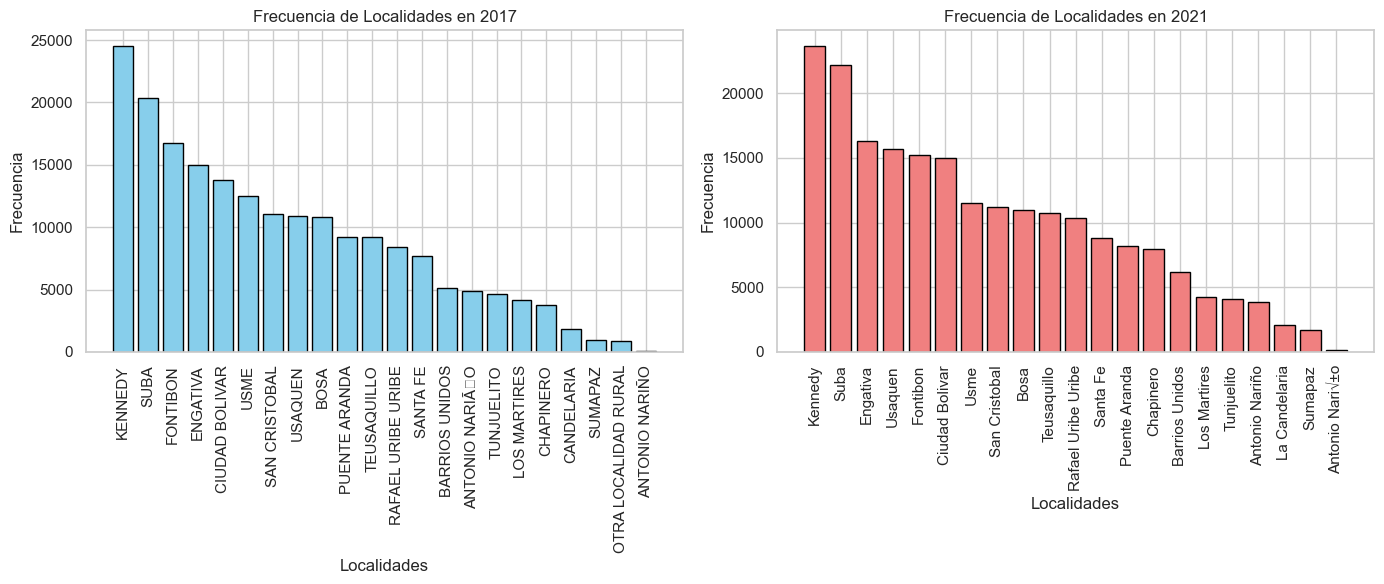

In [229]:
# Supongamos que df_preguntas_interes_2017 y df_preguntas_interes_2021 son tus DataFrames

# Obtener las variables únicas para el eje x y ordenarlas
variables_2017 = df_preguntas_interes_2017['LOCALIDAD_TEX'].value_counts().index
variables_2021 = df_preguntas_interes_2021['NOMBRE_LOCALIDAD'].value_counts().index

# Crear una figura con dos subgráficos en una fila y dos columnas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Primer subgráfico
axs[0].bar(variables_2017, df_preguntas_interes_2017['LOCALIDAD_TEX'].value_counts()[variables_2017], color='skyblue', edgecolor='black')
axs[0].set_title('Frecuencia de Localidades en 2017')
axs[0].set_xlabel('Localidades')
axs[0].set_ylabel('Frecuencia')
axs[0].tick_params(axis='x', rotation=90)  # Rotación y alineación horizontal a la derecha

# Segundo subgráfico
axs[1].bar(variables_2021, df_preguntas_interes_2021['NOMBRE_LOCALIDAD'].value_counts()[variables_2021], color='lightcoral', edgecolor='black')
axs[1].set_title('Frecuencia de Localidades en 2021')
axs[1].set_xlabel('Localidades')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=90)  # Rotación y alineación horizontal a la derecha

# Ajustar el diseño para evitar solapamiento de etiquetas
plt.tight_layout()

# Mostrar la figura con los dos subgráficos
plt.show()


In [230]:
df_preguntas_interes_2017['LOCALIDAD_TEX'].value_counts()

LOCALIDAD_TEX
KENNEDY                 24552
SUBA                    20323
FONTIBON                16768
ENGATIVA                14949
CIUDAD BOLIVAR          13749
USME                    12517
SAN CRISTOBAL           11026
USAQUEN                 10855
BOSA                    10791
PUENTE ARANDA            9243
TEUSAQUILLO              9209
RAFAEL URIBE URIBE       8432
SANTA FE                 7655
BARRIOS UNIDOS           5097
ANTONIO NARIÃO          4865
TUNJUELITO               4638
LOS MARTIRES             4162
CHAPINERO                3743
CANDELARIA               1826
SUMAPAZ                   952
OTRA LOCALIDAD RURAL      855
ANTONIO NARIÑO             89
Name: count, dtype: int64

In [231]:
df_preguntas_interes_2021['NOMBRE_LOCALIDAD'].value_counts()

NOMBRE_LOCALIDAD
Kennedy               23679
Suba                  22197
Engativa              16270
Usaquen               15707
Fontibon              15193
Ciudad Bolivar        14971
Usme                  11495
San Cristobal         11164
Bosa                  10964
Teusaquillo           10739
Rafael Uribe Uribe    10378
Santa Fe               8820
Puente Aranda          8160
Chapinero              7988
Barrios Unidos         6197
Los Martires           4232
Tunjuelito             4099
Antonio Nariño         3888
La Candelaria          2071
Sumapaz                1666
Antonio Nari√±o         121
Name: count, dtype: int64

Como se puede ver en el gráfico de barras todos los valores para las localidades tienen valores que tienen sentido. En el 2017 y 2021 la mayoria de las personas encuestadas eran de la localidad de Suba.

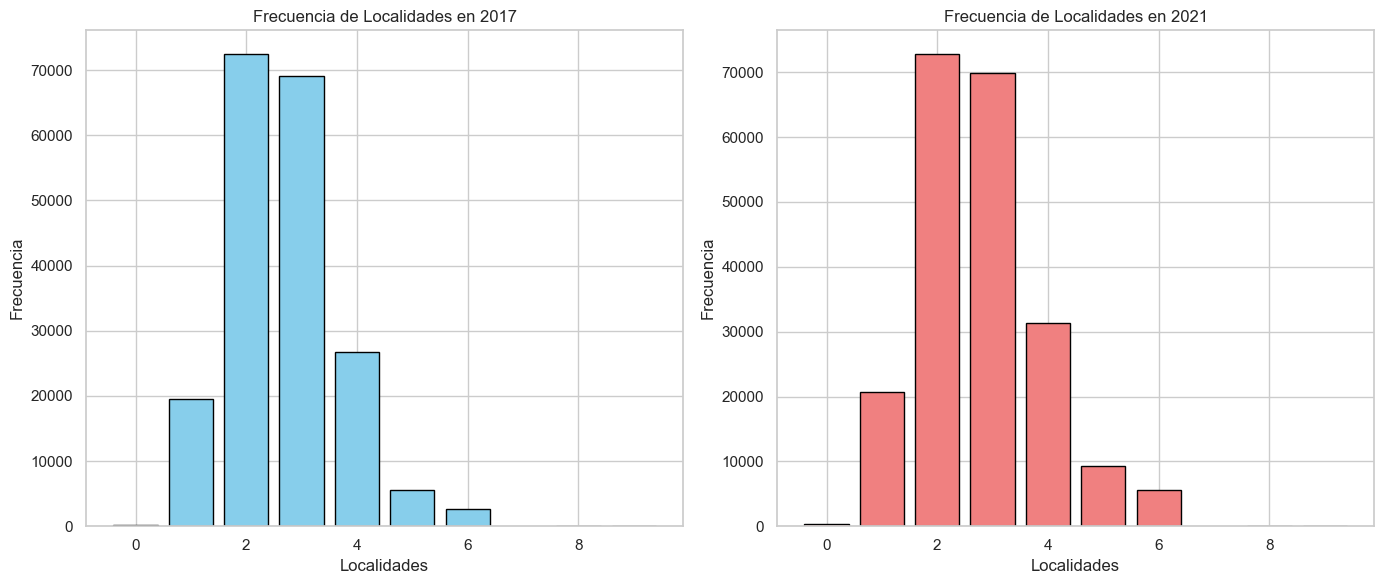

In [232]:
# Obtener las variables únicas para el eje x y ordenarlas
variables_2017 = df_preguntas_interes_2017['NVCBP11AA'].value_counts().index
variables_2021 = df_preguntas_interes_2021['NVCBP11AA'].value_counts().index

# Crear una figura con dos subgráficos en una fila y dos columnas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Primer subgráfico
axs[0].bar(variables_2017, df_preguntas_interes_2017['NVCBP11AA'].value_counts()[variables_2017], color='skyblue', edgecolor='black')
axs[0].set_title('Frecuencia de Localidades en 2017')
axs[0].set_xlabel('Localidades')
axs[0].set_ylabel('Frecuencia')
axs[0].tick_params(axis='x', rotation=0)  

# Segundo subgráfico
axs[1].bar(variables_2021, df_preguntas_interes_2021['NVCBP11AA'].value_counts()[variables_2021], color='lightcoral', edgecolor='black')
axs[1].set_title('Frecuencia de Localidades en 2021')
axs[1].set_xlabel('Localidades')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=0)  

# Ajustar el diseño para evitar solapamiento de etiquetas
plt.tight_layout()

# Mostrar la figura con los dos subgráficos
plt.show()

Como se puede ver en el gráfico superior los estratos 2 y 3 son los más prevalentes en la encuesta (tanto del 2017 y 2021) mientras que los estratos 1 y 6 no son tan relevantes. Igualmente, los estratos 5 y 6 tampoco aportan mucho peso a la encuesta.

#### 2.2 Barras de Frecuencia
Finalmente, para visualizar de manera más clara cuáles parejas de variables (preguntas) se encuentran más correlacionadas entre sí se puede construir un mapa de calor. La idea es escoger una pareja que no se encuntre tan correlacionada sin llegar al extermo de no tener relacion estadictica alguna una con la otra, es decir, que su valor no sea ni muy cercano a 1 ni a -1, ya que asi se obtienen mejores resultados al momento de entrenar un modelo


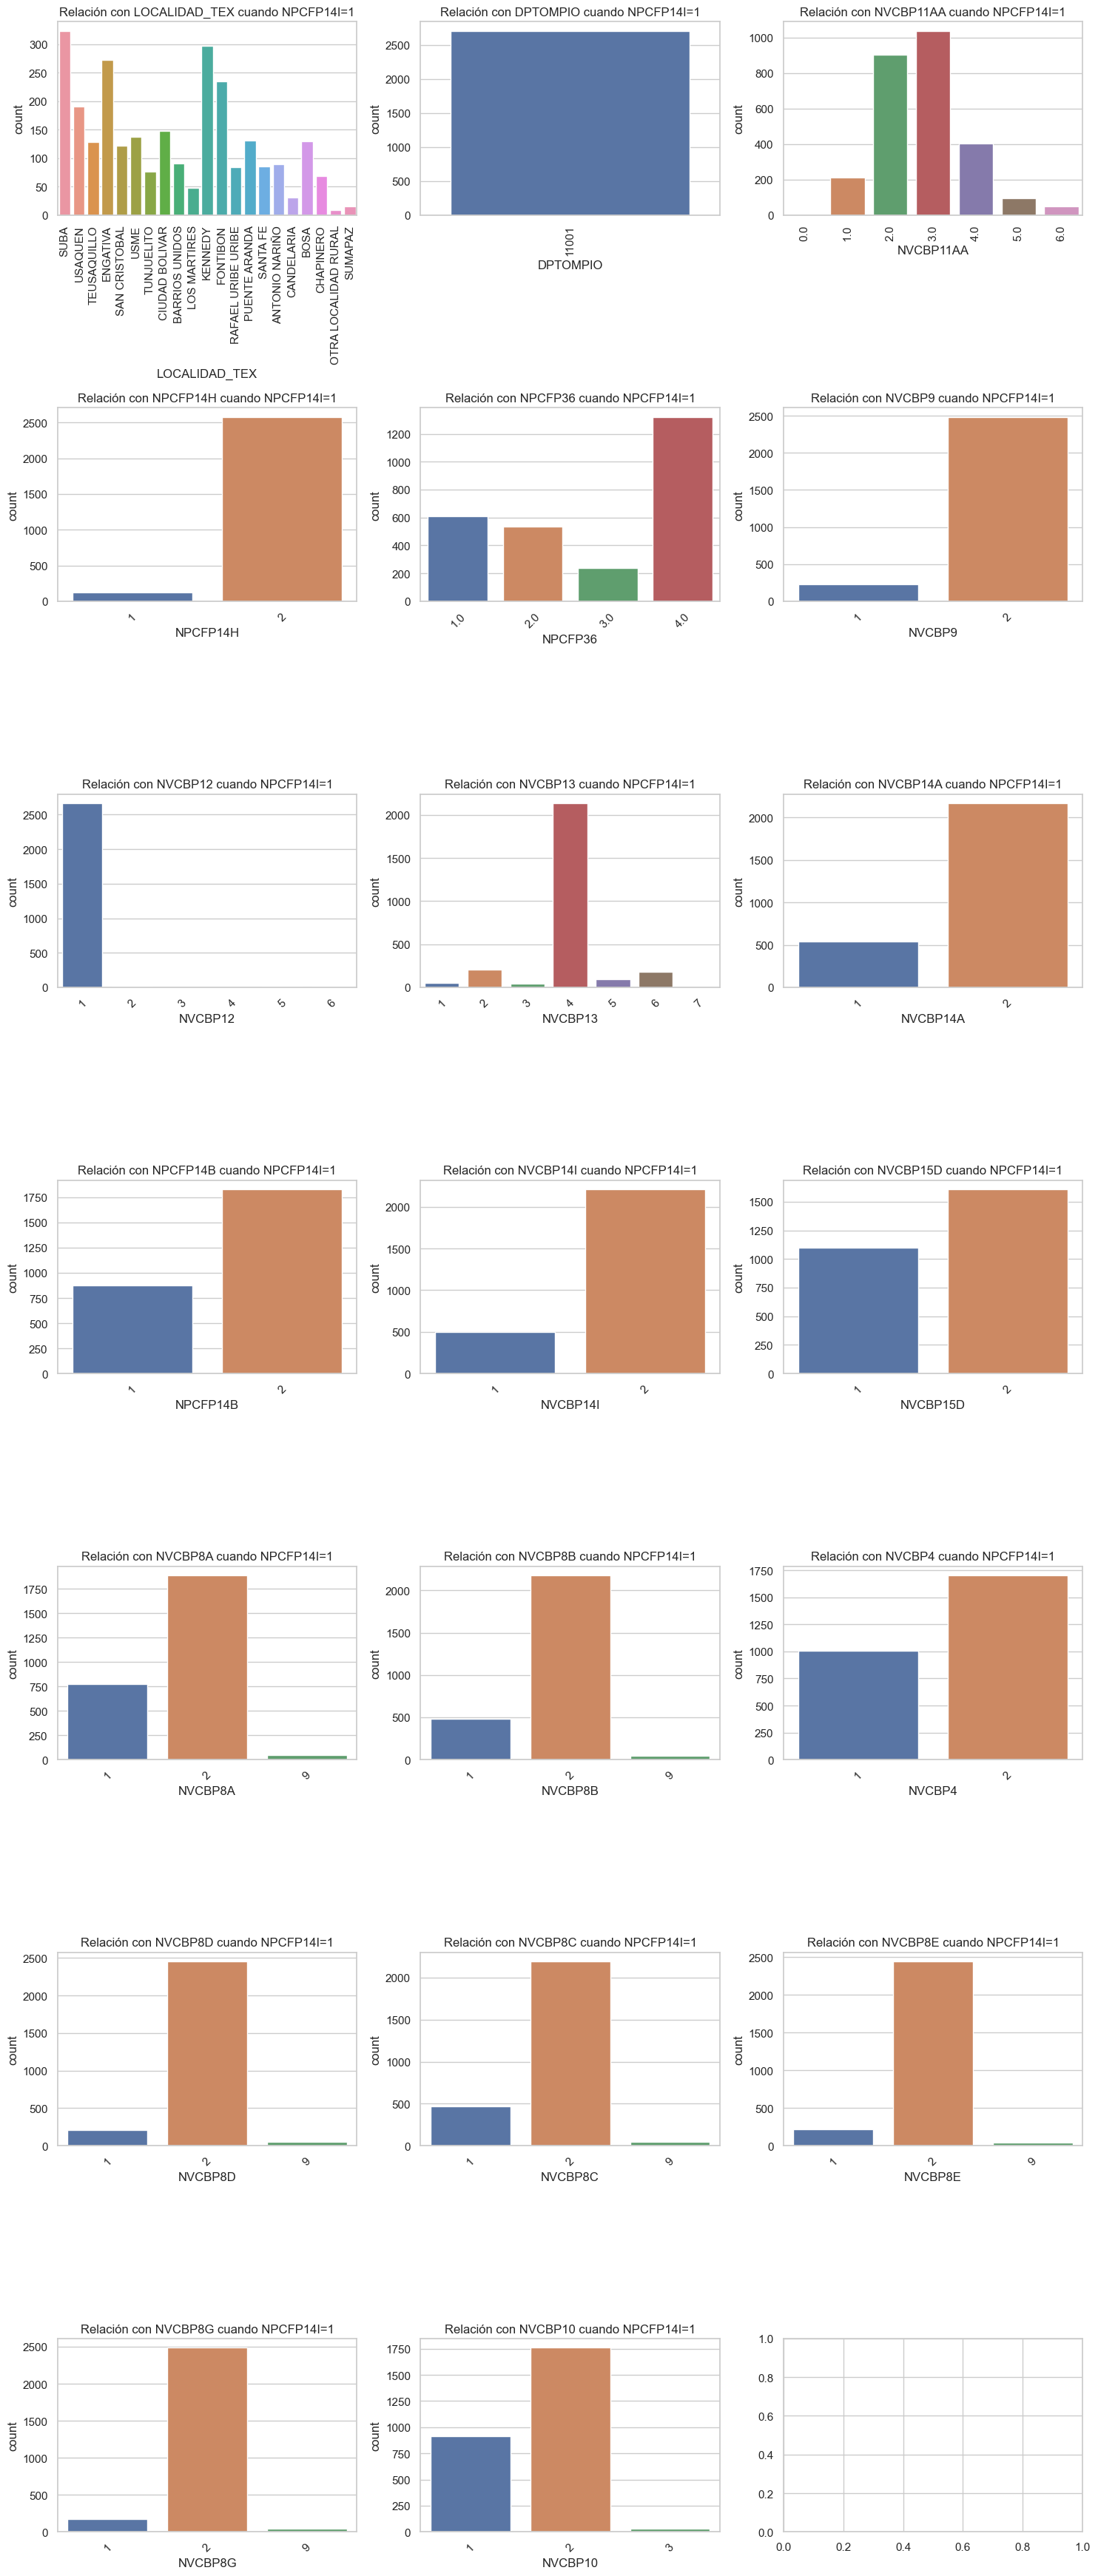

In [233]:
# Filtrar el DataFrame para cuando la respuesta a NPCFP14I es 1, es decir la persona tiene asma
df_filtered = df_preguntas_interes_2017[df_preguntas_interes_2017['NPCFP14I'] == 1]

# Obtener las variables diferentes de 'NPCFP14I'
otras_variables = df_preguntas_interes_2017.columns[df_preguntas_interes_2017.columns != 'NPCFP14I']

# Calcular el número de filas y columnas necesario para mostrar las gráficas
num_filas = (len(otras_variables) + 2) // 3
num_columnas = 3

# Crear una figura con subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, num_filas * 5))

# Iterar sobre las otras variables y mostrar un gráfico de barras para cada una
for i, variable in enumerate(otras_variables):
    row = i // num_columnas
    col = i % num_columnas

    # Rotar las etiquetas del eje x solo en la primera fila
    rotation = 90 if row == 0 else 45

    sns.countplot(x=variable, data=df_filtered, ax=axs[row, col])
    axs[row, col].set_title(f'Relación con {variable} cuando NPCFP14I=1')
    axs[row, col].tick_params(axis='x', rotation=rotation)  # Ajustar la rotación

# Ajustar el diseño
plt.tight_layout()
plt.show()

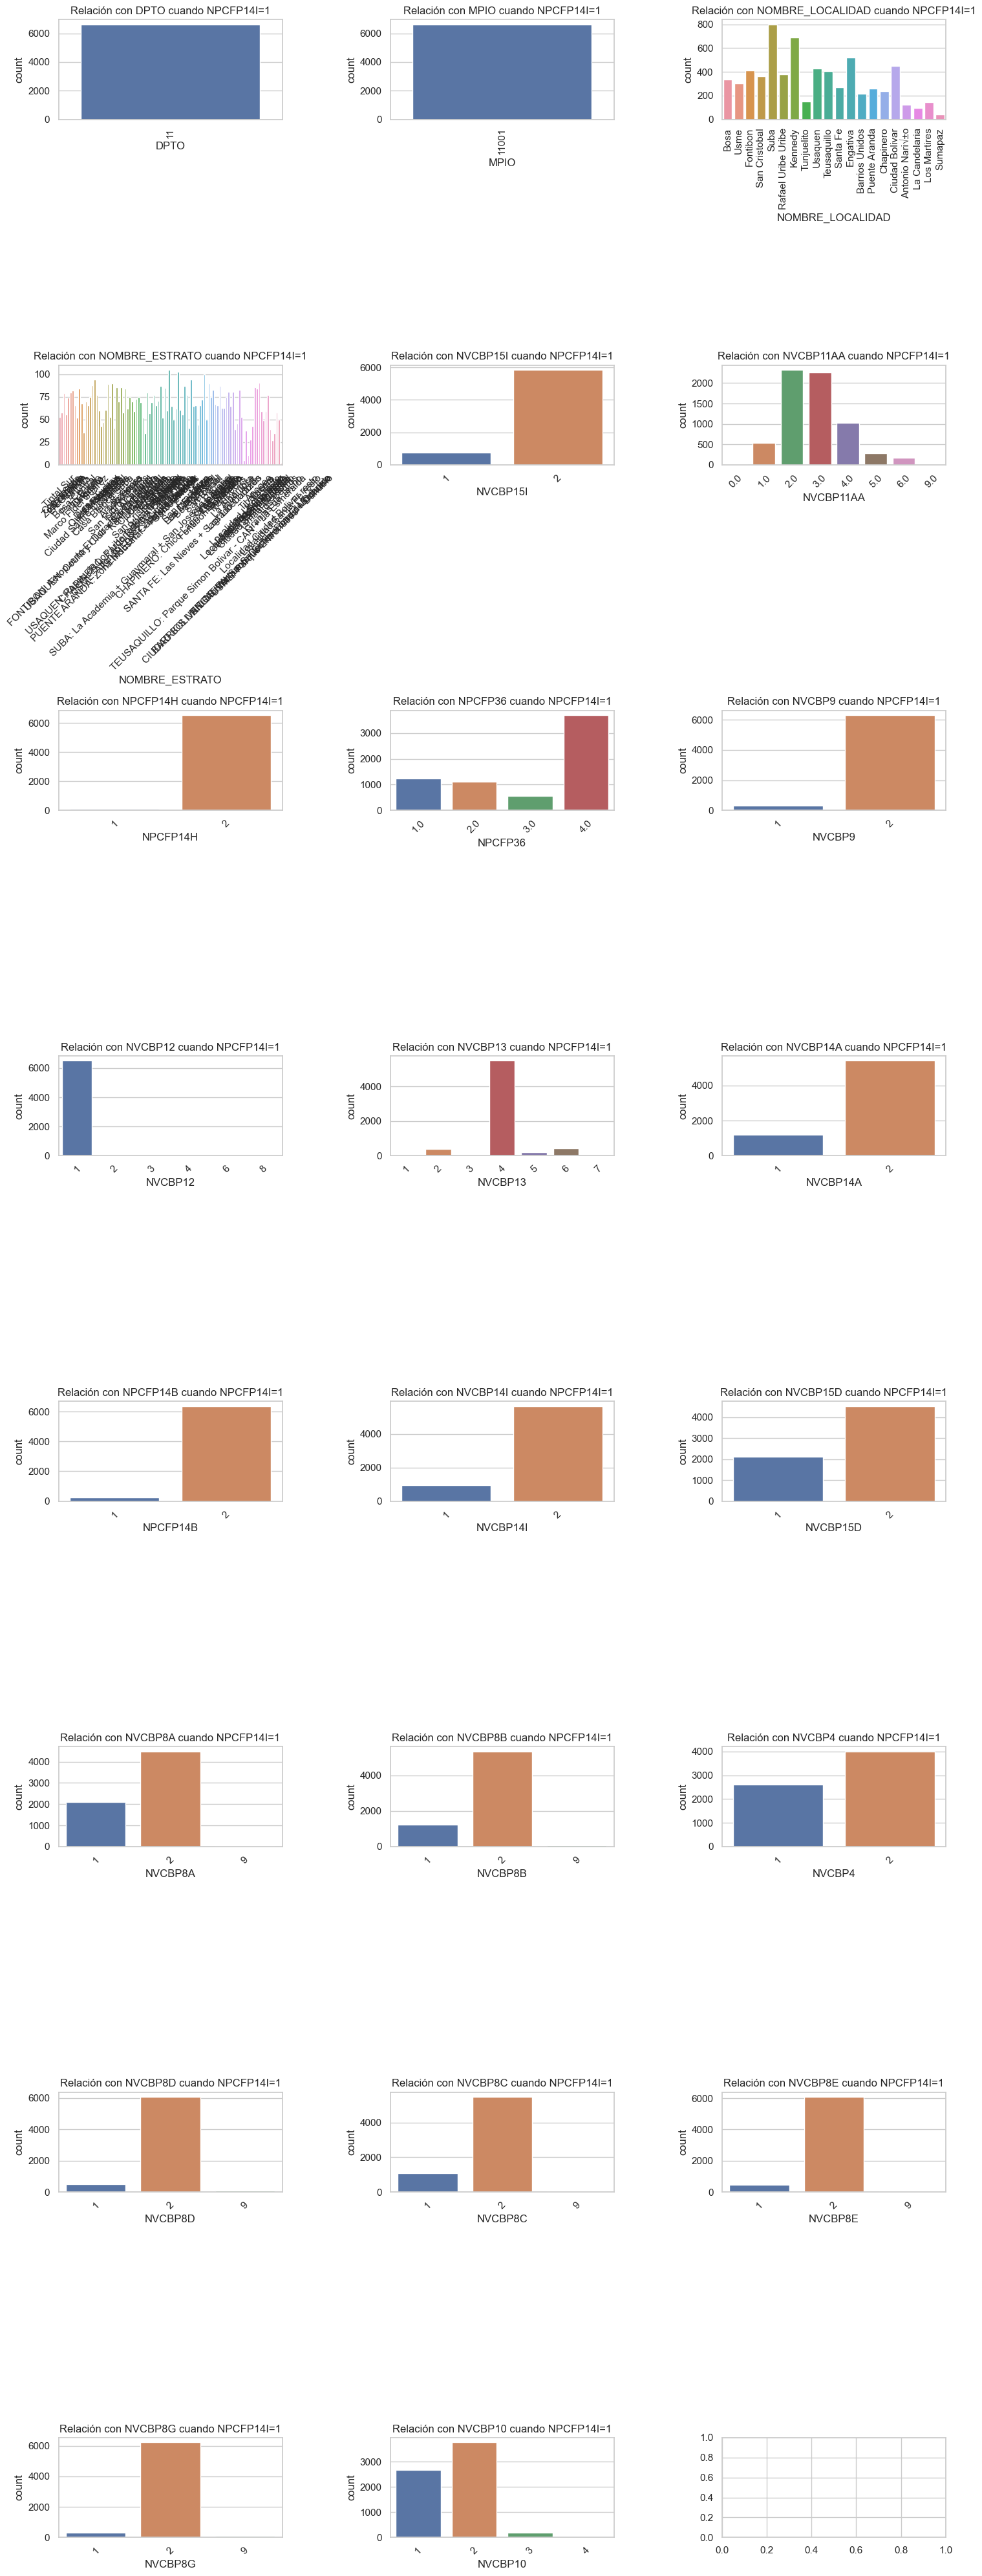

In [234]:
# Filtrar el DataFrame para cuando la respuesta a NPCFP14I es 1, es decir la persona tiene asma
df_filtered = df_preguntas_interes_2021[df_preguntas_interes_2021[COLUMNA_ASMA_2021] == 1]

# Obtener las variables diferentes de 'NPCFP14I'
otras_variables = df_preguntas_interes_2021.columns[df_preguntas_interes_2021.columns != COLUMNA_ASMA_2021]

# Calcular el número de filas y columnas necesario para mostrar las gráficas
num_filas = (len(otras_variables) + 2) // 3
num_columnas = 3

# Crear una figura con subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, num_filas * 5))

# Iterar sobre las otras variables y mostrar un gráfico de barras para cada una
for i, variable in enumerate(otras_variables):
    row = i // num_columnas
    col = i % num_columnas

    # Rotar las etiquetas del eje x solo en la primera fila
    rotation = 90 if row == 0 else 45

    sns.countplot(x=variable, data=df_filtered, ax=axs[row, col])
    axs[row, col].set_title(f'Relación con {variable} cuando NPCFP14I=1')
    axs[row, col].tick_params(axis='x', rotation=rotation)  # Ajustar la rotación

# Ajustar el diseño
plt.tight_layout()
plt.show()

### 2.3 Prueba de chi-cuadrado

Para examinar la asociación entre varias variables categóricas, se puede utilizar la prueba de independencia de chi-cuadrado de Pearson. Esta prueba evalúa si hay una relación significativa entre dos variables categóricas.

La prueba de chi-cuadrado (χ²) es una prueba estadística que se utiliza para determinar si hay una asociación significativa entre dos variables categóricas. La prueba evalúa si las observaciones empíricas, que están organizadas en una tabla de contingencia, difieren de las expectativas teóricas bajo la hipótesis nula de independencia entre las variables.


La prueba de chi-cuadrado (χ²) es una prueba estadística que se utiliza para determinar si hay una asociación significativa entre dos variables categóricas. La prueba evalúa si las observaciones empíricas, que están organizadas en una tabla de contingencia, difieren de las expectativas teóricas bajo la hipótesis nula de independencia entre las variables.

Aquí hay una descripción básica de cómo funciona la prueba de chi-cuadrado:

1. Hipótesis Nula (H₀): La hipótesis nula asume que no hay asociación entre las dos variables categóricas; son independientes.

2. Valor p: Se determina la probabilidad de obtener el estadístico de prueba observado (o uno más extremo) bajo la hipótesis nula.

3. Conclusión: Si el valor p es menor que el nivel de significancia elegido (de 0.05), se rechaza la hipótesis nula, lo que sugiere que hay una asociación significativa entre las variables.

En primer lugar, se hara este procedimiento para la encuesta realizada en el año 2017:

In [235]:
nivel_de_significancia = 0.05

 Valor p:  0.0  de NPCFP14I y  LOCALIDAD_TEX
 Valor p:  1.0  de NPCFP14I y  DPTOMPIO
 Valor p:  3.7737676519065285e-07  de NPCFP14I y  NVCBP11AA
 Valor p:  1.4105024935194305e-63  de NPCFP14I y  NPCFP14H
 Valor p:  6.26950757181907e-09  de NPCFP14I y  NPCFP36
 Valor p:  3.0271061814637914e-05  de NPCFP14I y  NVCBP9
 Valor p:  0.32679113266922916  de NPCFP14I y  NVCBP12
 Valor p:  1.2049352045295015e-08  de NPCFP14I y  NVCBP13
 Valor p:  4.951991543223993e-06  de NPCFP14I y  NVCBP14A
 Valor p:  0.0  de NPCFP14I y  NPCFP14B
 Valor p:  1.4050464585866358e-06  de NPCFP14I y  NVCBP14I
 Valor p:  1.400215932294461e-11  de NPCFP14I y  NVCBP15D
 Valor p:  1.922266713944659e-14  de NPCFP14I y  NVCBP8A
 Valor p:  5.1393183217664783e-11  de NPCFP14I y  NVCBP8B
 Valor p:  0.17503362499608835  de NPCFP14I y  NVCBP4
 Valor p:  4.436558896538077e-08  de NPCFP14I y  NVCBP8D
 Valor p:  1.7275114389404913e-11  de NPCFP14I y  NVCBP8C
 Valor p:  1.3793099073935014e-09  de NPCFP14I y  NVCBP8E
 Valor p:  1.

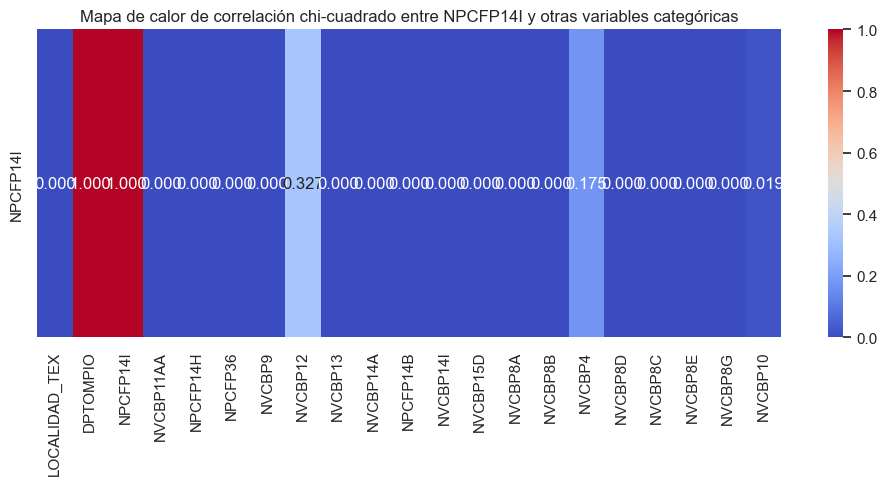

In [236]:
from scipy.stats import chi2_contingency

# Seleccionar las columnas relevantes
columnas_seleccionadas = preguntas_interes_2017 + preguntas_comunes

# Crear una matriz para almacenar los p-values de chi-cuadrado
p_values_matrix = pd.DataFrame(index=['NPCFP14I'], columns=columnas_seleccionadas)

# Calcular las pruebas de chi-cuadrado y llenar la matriz
for col in columnas_seleccionadas:
    if col != 'NPCFP14I':
        tabla_contingencia = pd.crosstab(df_preguntas_interes_2017['NPCFP14I'], df_preguntas_interes_2017[col])
        chi2, p_value, _, _ = chi2_contingency(tabla_contingencia)
        p_values_matrix.at['NPCFP14I', col] = p_value
        print(" Valor p: ", p_value, " de NPCFP14I y ", col)

# Convertir p-values a números y establecer NaN en 1 (sin significancia)
p_values_matrix = p_values_matrix.apply(pd.to_numeric, errors='coerce').fillna(1)

# Crear un mapa de calor
plt.figure(figsize=(12, 4))
sns.heatmap(p_values_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Mapa de calor de correlación chi-cuadrado entre NPCFP14I y otras variables categóricas')
plt.show()

A partir del mapa de calor construido se analizará el valor p para cada una de las variables contruidas:


1. Valor p menor que el nivel de significancia (0.05):

    - Interpretación: Se rechaza la hipótesis nula.

    - Significado: Hay evidencia significativa para decir que existe una correlación significativa entre las variables categoricas en estudio.
    
2. Valor p mayor que el nivel de significancia (0.05):

    - Interpretación: No se rechaza la hipótesis nula.
    
    - Significado: No hay evidencia significativa para decir que existe una correlación significativa entre las variables categoricas en estudio.

In [237]:
p_values_matrix


,LOCALIDAD_TEX,DPTOMPIO,NPCFP14I,NVCBP11AA,NPCFP14H,NPCFP36,NVCBP9,NVCBP12,NVCBP13,NVCBP14A,NPCFP14B,NVCBP14I,NVCBP15D,NVCBP8A,NVCBP8B,NVCBP4,NVCBP8D,NVCBP8C,NVCBP8E,NVCBP8G,NVCBP10
NPCFP14I,0.0,1.0,1.0,3.773768e-07,1.410502e-63,6.269508e-09,0.00003,0.326791,1.204935e-08,0.000005,0.0,0.000001,1.400216e-11,1.922267e-14,5.139318e-11,0.175034,4.436559e-08,1.727511e-11,1.379310e-09,0.000001,0.019212


Construyendo la siguiente tabla se ilutra ilustra si el valor es menor al nivel de significancia o no:

In [238]:
p_values_matrix = p_values_matrix.applymap(lambda x: x < nivel_de_significancia)
print(p_values_matrix.T)

               NPCFP14I
LOCALIDAD_TEX      True
DPTOMPIO          False
NPCFP14I          False
NVCBP11AA          True
NPCFP14H           True
NPCFP36            True
NVCBP9             True
NVCBP12           False
NVCBP13            True
NVCBP14A           True
NPCFP14B           True
NVCBP14I           True
NVCBP15D           True
NVCBP8A            True
NVCBP8B            True
NVCBP4            False
NVCBP8D            True
NVCBP8C            True
NVCBP8E            True
NVCBP8G            True
NVCBP10            True


Como se puede ver en la matriz superior NO existe una corelacion entre las siguientes variables categoricas:

1. NPCFP14I y DPTOMPIO: ¿Cuál es el material predominante de las paredes exteriores?

2. NPCFP14I y NVCBP12: Divipola departamento-municipio

3. NPCFP14I y NVCBP4: ¿La edificación está ubicada en un conjunto cerrado?


Valor p:  1.0  de NPCFP14F y  DPTO
Valor p:  1.0  de NPCFP14F y  MPIO
Valor p:  0.0  de NPCFP14F y  NOMBRE_LOCALIDAD
Valor p:  0.0  de NPCFP14F y  NOMBRE_ESTRATO
Valor p:  2.208022868777433e-08  de NPCFP14F y  NVCBP15I
Valor p:  0.0005192182645002682  de NPCFP14F y  NVCBP11AA
Valor p:  1.6375752177742651e-43  de NPCFP14F y  NPCFP14H
Valor p:  4.052390104805779e-56  de NPCFP14F y  NPCFP36
Valor p:  0.026445953800958887  de NPCFP14F y  NVCBP9
Valor p:  0.22931271089508784  de NPCFP14F y  NVCBP12
Valor p:  0.018098645017390978  de NPCFP14F y  NVCBP13
Valor p:  0.0005805383946286839  de NPCFP14F y  NVCBP14A
Valor p:  1.4669161570734745e-61  de NPCFP14F y  NPCFP14B
Valor p:  2.0087916219006977e-06  de NPCFP14F y  NVCBP14I
Valor p:  3.4955296429863853e-08  de NPCFP14F y  NVCBP15D
Valor p:  1.0292848648931146e-31  de NPCFP14F y  NVCBP8A
Valor p:  2.60310712464243e-22  de NPCFP14F y  NVCBP8B
Valor p:  0.6754017170004928  de NPCFP14F y  NVCBP4
Valor p:  1.577511923783412e-20  de NPCFP14F y  NVC

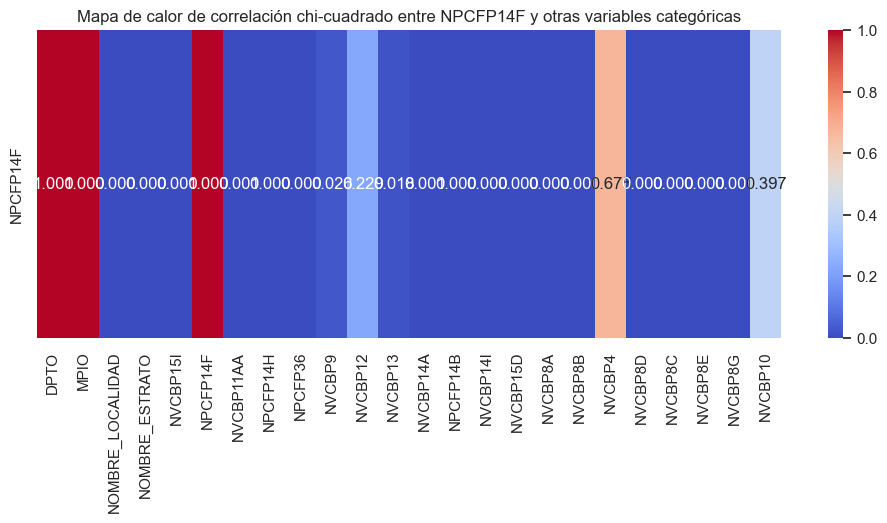

In [239]:
# Seleccionar las columnas relevantes
columnas_seleccionadas = preguntas_interes_2021 + preguntas_comunes

# Crear una matriz para almacenar los p-values de chi-cuadrado
p_values_matrix = pd.DataFrame(index=['NPCFP14F'], columns=columnas_seleccionadas)

# Calcular las pruebas de chi-cuadrado y llenar la matriz
for col in columnas_seleccionadas:
    if col != 'NPCFP14F':
        tabla_contingencia = pd.crosstab(df_preguntas_interes_2021['NPCFP14F'], df_preguntas_interes_2021[col])
        _, p_value, _, _ = chi2_contingency(tabla_contingencia)
        p_values_matrix.at[COLUMNA_ASMA_2021, col] = p_value
        print("Valor p: ", p_value, " de NPCFP14F y ", col)

# Convertir p-values a números y establecer NaN en 1 (sin significancia)
p_values_matrix = p_values_matrix.apply(pd.to_numeric, errors='coerce').fillna(1)

# Crear un mapa de calor
plt.figure(figsize=(12, 4))
sns.heatmap(p_values_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Mapa de calor de correlación chi-cuadrado entre NPCFP14F y otras variables categóricas')
plt.show()

In [240]:
p_values_matrix

,DPTO,MPIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP15I,NPCFP14F,NVCBP11AA,NPCFP14H,NPCFP36,NVCBP9,NVCBP12,NVCBP13,NVCBP14A,NPCFP14B,NVCBP14I,NVCBP15D,NVCBP8A,NVCBP8B,NVCBP4,NVCBP8D,NVCBP8C,NVCBP8E,NVCBP8G,NVCBP10
NPCFP14F,1.0,1.0,0.0,0.0,2.208023e-08,1.0,0.000519,1.637575e-43,4.052390e-56,0.026446,0.229313,0.018099,0.000581,1.466916e-61,0.000002,3.495530e-08,1.029285e-31,2.603107e-22,0.675402,1.577512e-20,3.115864e-22,5.035238e-11,8.111657e-07,0.3969


In [241]:
p_values_matrix = p_values_matrix.applymap(lambda x: x < nivel_de_significancia)
print(p_values_matrix.T)

                  NPCFP14F
DPTO                 False
MPIO                 False
NOMBRE_LOCALIDAD      True
NOMBRE_ESTRATO        True
NVCBP15I              True
NPCFP14F             False
NVCBP11AA             True
NPCFP14H              True
NPCFP36               True
NVCBP9                True
NVCBP12              False
NVCBP13               True
NVCBP14A              True
NPCFP14B              True
NVCBP14I              True
NVCBP15D              True
NVCBP8A               True
NVCBP8B               True
NVCBP4               False
NVCBP8D               True
NVCBP8C               True
NVCBP8E               True
NVCBP8G               True
NVCBP10              False


Como se puede ver en la matriz superior NO existe una corelacion entre las siguientes variables categoricas:

1. NPCFP14F y DPTO: Departamento

2. NPCFP14F y MPIO: Municipio

3. NPCFP14F y NVCBP12: ¿Cuál es el material predominante de las paredes exteriores?

4. NPCFP14F y NVCBP4: ¿La edificación está ubicada en un conjunto residencial?

5. NPCFP14F y NVCBP10: Tipo de vivienda

Como se pudo ver en ambas encuestas de los años 2017 y 2021 coinciden en que las preguntas de: ¿Cuál es el material predominante de las paredes exteriores? (NVCBP12) y ¿La edificación está ubicada en un conjunto cerrado? (NVCBP4) no tienen corelacion alguna con las repsuestas dadas acerca de las enfermedades respiratorias en las respectivas encuentas. Del mismo modo, el municipio - departamento tampoco parce ser una variable relevante en la corelacion, esto puede deberse a falta de variabilidad en los datos.

Por otro lado, la gran mayoria de otras variables escogidas tienen una alta corelacion y deben de ser tomadas en cuenta para posteriores analisis y para el modelamiento del modelo multidimensional, creación del Data mart y proceso ETL. 